# Systematic Risk

Systematic risk refers to the likelihood of financial instability that can lead to widespread failures within the financial system. Unlike other risks, systematic risk cannot be mitigated through diversification, only through hedging. In an economic downturn, the bankruptcy of one firm cannot be easily absorbed by stronger competitors. Given its complex nature, there are multiple definitions and models for systematic risk. Monitoring this risk is crucial as it helps systematically important financial institutions and policymakers calibrate or limit risk exposure.

### Systematic Risk Review

Value-At-Risk is the most a financial firm can loss over a period of time with some confidence $1-\alpha$. Formally VaR of $R$ is defined as follows




\begin{equation}
VaR_\alpha(R) = -\inf\{x:\mathbb{P}[R \le r] \ge \alpha \}
= -\sup\{x:\mathbb{P}[R \le r] <\alpha \}
\end{equation}


VaR is a basic model with several well-known limitations, including a lack of sub-additivity and failure to consider tail dependency. In contrast, Expected Shortfall (ES) improves upon VaR as it is a coherent risk measure that satisfies monotonicity, sub-additivity, positive homogeneity, and translation invariance. Expected shortfall is the expected loss conditional on returns being less that VaR. Expected shortfall measures the average loss in scenarios where losses exceed the VaR. In a market with $n$ financial institutions the overall return $R$ can be decomposed into contributions $w_i$ from individual returns $r_i$, that is $R=\sum_{i=1}^{n} w_ir_i$ 


\begin{equation}
\begin{split}
	ES_\alpha &= -\mathbb{E}[R|R\le -Var] \\
&= -\sum_{i=1}^{n} w_i\mathbb{E}[r_i|R \le -VaR]\\
\end{split}
\end{equation}

It follows from above that the Marginal Expected Shortfall(MES), that is the risk contribution of a single institution $i$ to the total risk can be expressed as follows.

\begin{equation}
MES_i = \frac{\partial ES_a}{\partial w_i} = - \mathbb{E}[r_i|R \le -VaR]
\end{equation}

A drawback of expected shortfall is that it cannot be used proactively since it relies on the actual occurrence of the risk. We extend this definition to account for the market value of an institution $M_t$, $ M_t=W_t+D_t$ where ($W_t$) is the working capital and $D_t$ is the debt of said institution at time $t$. The expected capital shortfall is the amount lost during a crisis. The capital shortfall of an institution is defined as $CS_{it}=k(D_{t+h}+W_{t+h})-W_{t+h}$. It is assumed that the debt cannot be renegotiated during a crisis.

\begin{equation}
\begin{split}
ECS_t&=\mathbb{E}_t[k(D_{t+h}+W_{t+h})-W_{t+h}|R_{\Delta t}\lt C]\\
&= kD_t -(1-k)\mathbb{E}[W_{t+h}|R_{\Delta t}\lt C] \\
&= kD_t -(1-k)W_t\mathbb{E}_t[R_{i,t+h}|R_{m,t+h}\lt C] \\
&= kD_t -(1-k)W_t(1-LRMES) 
\end{split}
\end{equation}

The Long Run Marginal Expected Shortfall (LRMES) is an extension of MES over horizon $h$, at a percentage market crash $C$, is defined as $LRMES= - \mathbb{E}_t[R_{i,t+1:t+h}|R_{m,t+1:t+h}\lt C]$. When the capital shortfall is negative, it indicates that the firm has a capital surplus. However, a positive capital shortfall suggests that the firm is at risk. Factors contributing to capital shortfall include the firm's size, leverage, and risk exposure.

### GARCH-DCC

The $LRMES$ captures the dependency of the institution returns to those of the market. The joint returns between the market and institution given information $\mathcal{F_{t-1}}$ till $t-1$ can be expressed as


\begin{equation}
\left( \begin{matrix}
 r_{it} \\ 
 r_{mt}
\end{matrix} \right) |\mathcal{F}_{t-1}
\sim \mathcal{D}\left(\left( \begin{matrix}
0 \\
0
\end{matrix} \right),\left[\begin{matrix}
 \sigma_{it}^2 & \rho_{it}\sigma_{it}\sigma_{mt} \\
 \rho_{it}\sigma_{it}\sigma_{mt} & \sigma_{mt}^2
\end{matrix}\right]\right)  
\end{equation}

Where $r_{it}=log(1+R_{it})$ and $r_{mt}=log(1+R_{mt})$. There are numerous techniques for determining the conditional covariance matrix such as VEC, BEKK, CCC and DCC. However we will use DCC as its computational efficient compared to the other models. We model the variances in the above equation using a GJR-GARCH(1,1,1) model which takes into account the leverage effect, where negative shocks have a larger impact compared to positive shocks.

\begin{equation}
r_t= \varepsilon_t \sqrt{\mathbf{H_t}}, \varepsilon_t  \sim \mathcal{N}(0, \mathbf{I})
\end{equation}

\begin{equation}
\sigma_t^2=w+(\alpha+\gamma\mathbb{1}_{r_{t-1<0}})r_{t-1}^2+\beta\sigma^2_{t-1}
\end{equation}

The indicator function $\mathbb{1}_{r_{t-1<0}}$ introduces asymmetrical shocks as negative shocks are emphasised by a factor of $\gamma$. The covariance matrix $\mathbf{H}_t$ can be decomposed as 

\begin{equation}
\mathbf{H}_t = \mathbf{D}_t\mathbf{R}_t\mathbf{D}_t
\end{equation}

$\mathbf{D}_t=\text{diag}(\sqrt{\sigma_t})$ contains the conditional variances of the a univariate GARCH(1,1) for each asset. $\mathbf{R}_t$ is the time varying conditional correlations matrix.

\begin{equation}
corr\left( \begin{matrix}
  \varepsilon_{it} \\
 \varepsilon_{mt}
\end{matrix} \right) = \left(\begin{matrix}
1 & \rho_{it} \\
 \rho_{it} &  1
\end{matrix}\right)=\mathbf{R}_t = \text{diag}(\mathbf{Q}_t)^{-1/2} \mathbf{Q}_t \text{diag}(\mathbf{Q}_t)^{-1/2}
\end{equation}

$\mathbf{R}_t$ is estimated using the pseudo correlation matrix $Q_t$.
\begin{equation}
Q_t = \left( 1-\alpha-\beta \right)S+\alpha\left( \varepsilon_{t-1} \varepsilon_{t-1}'\right)+\beta Q_{t-1}
\end{equation}

Where $S$ is the unconditional correlation matrix

## Example Dynamic Conditional Correlation [(DCC)](https://www.diva-portal.org/smash/get/diva2:1800505/FULLTEXT01.pdf)

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
eu_usd = yf.download("EURUSD=X",start="2004-01-01",end="2025-01-01")
yn_usd = yf.download("JPY=X",start="2004-01-01",end="2025-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# log returns
eu_returns = 100*np.log(eu_usd['Close']/eu_usd['Close'].shift(1)).dropna()
yn_returns = 100*np.log(yn_usd['Close']/yn_usd['Close'].shift(1)).dropna()

### Compute standardised residuals

In [4]:
eu_volatility_model = arch_model(eu_returns,vol="GARCH",p=1,o=1,q=1)
eu_volatility = eu_volatility_model.fit(update_freq=5,disp="off")

yn_volatility_model = arch_model(yn_returns,vol="GARCH",p=1,o=1,q=1)
yn_volatility = yn_volatility_model.fit(update_freq=5,disp="off")

In [5]:
print(eu_volatility.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -4515.49
Distribution:                  Normal   AIC:                           9040.99
Method:            Maximum Likelihood   BIC:                           9074.00
                                        No. Observations:                 5449
Date:                Sat, Jan 18 2025   Df Residuals:                     5448
Time:                        14:38:33   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.1384e-03  6.555e-03     -0.326      0.

In [6]:
print(yn_volatility.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -4848.34
Distribution:                  Normal   AIC:                           9706.68
Method:            Maximum Likelihood   BIC:                           9739.70
                                        No. Observations:                 5449
Date:                Sat, Jan 18 2025   Df Residuals:                     5448
Time:                        14:38:33   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0122  7.406e-03      1.653  9.839e-02 

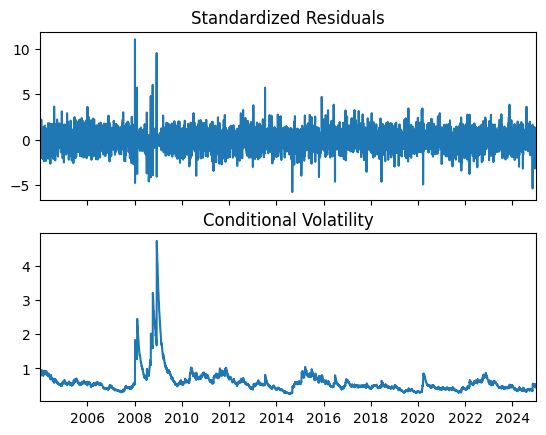

In [7]:
fig = eu_volatility.plot()

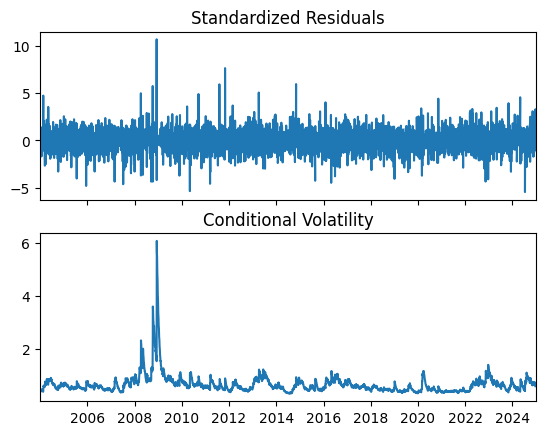

In [8]:
fig = yn_volatility.plot()

### Compute DCC

In [9]:
eu_std = eu_volatility.std_resid
yn_std = yn_volatility.std_resid
eu_yn_std = np.column_stack((eu_std.values,yn_std.values))
Q_bar = np.cov(eu_yn_std.T)

The parameters $\alpha$ and $\beta$ can be estimated using the below likelihood function using MLE.
\begin{equation}
\ell = -\frac{1}{2} \sum_{t=1}^T  \left[   \ln(|\mathbf{R}_t|) + \mathbf{\epsilon}_t' \mathbf{R}_t^{-1} \mathbf{\epsilon}_t -\mathbf{\epsilon}_t'\mathbf{\epsilon}_t\right]
\end{equation}

In [10]:
def likelihood(Rt,eta):

  log_likelihood = 0
  for t in range(len(Rt)):
    log_likelihood = log_likelihood + np.log(np.linalg.det(Rt[t])) + eta[t].T @ np.linalg.inv(Rt[t]) @ eta[t] - eta[t].T @ eta[t]

  return -0.5*log_likelihood

In [11]:
def conditional_corr(alpha,beta,Q_bar,eu_yn_std):
  Qt = Q_bar
  Rt_list = []

  for t in range(1,len(eu_yn_std)):
    Qt = (1-alpha-beta)*Q_bar + alpha*np.matmul(eu_yn_std[[t-1]].T, eu_yn_std[[t-1]]) + beta*Qt
    Qt_inv = np.diag(1/np.sqrt(np.diag(Qt)))
    Rt = Qt_inv @ Qt @ Qt_inv # normalise for values to be between -1 and 1
    Rt_list.append(Rt)

  return Rt_list

In [12]:
def objective(params,Q_bar,eu_yn_std):

  alpha , beta = params
  Rt_list = conditional_corr(alpha,beta,Q_bar,eu_yn_std)

  return -1*likelihood(Rt_list,eu_yn_std) # negative because we minimise

In [13]:
def stationarity_condition(params):
  alpha, beta = params
  return 1.0 - (alpha + beta)

In [14]:
inital_vals = [0.02,0.9]
cons = ({'type': 'ineq', 'fun': stationarity_condition})
bounds = [(0, 1), (0, 1)]

In [15]:
res = minimize(objective, inital_vals,method='SLSQP', bounds=bounds, args=(Q_bar,eu_yn_std), constraints=cons)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1092.6660755533824
       x: [ 2.528e-01  6.841e-01]
     nit: 10
     jac: [-2.577e-01 -1.306e-01]
    nfev: 34
    njev: 10

In [16]:
alpha , beta = res.x
cond_corr = conditional_corr(alpha,beta,Q_bar,eu_yn_std)
corr = []
for rt in cond_corr:
  corr.append(rt[0,1])
corr_with_dates = pd.Series(corr, index=eu_usd.index[2:])

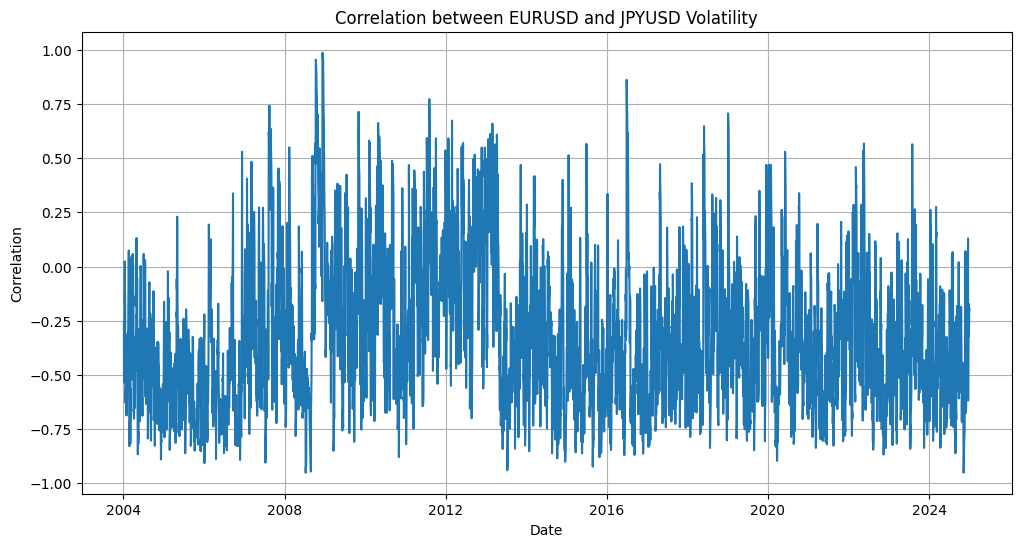

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(corr_with_dates)
plt.title('Correlation between EURUSD and JPYUSD Volatility')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()